# <center >Boussiala Mohamed Nachid
## <center > boussiala.nachid@univ-alger3.dz

In [1]:
# import the base package
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import range_unit_root_test
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# generate a synthetic TS with a unit root (randow walk)

np.random.seed(42)
n=200
errors= np.random.normal(size =n)
y = np.cumsum(errors)  # random walk process


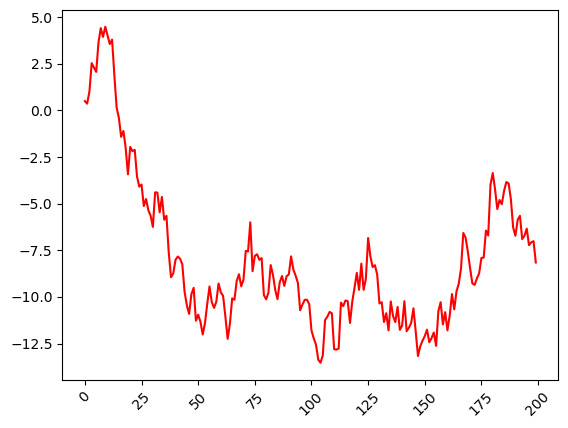

In [3]:
# Single line plot
plt.figure()
plt.plot(y, color= 'red')
plt.xticks(rotation=45)
plt.show()

In [4]:
# perform the range unit root (RUR) test
rur_stat , p_value , crit  = range_unit_root_test(y)

In [5]:
# Print results
print(f"{'Range unit root (RUR) statistic:':<35} {round(rur_stat, 3)}")
print(f"{'p_value:' :<35} {p_value} ")
print(f"{'Critical Values:   ':<35} {crit}" )


Range unit root (RUR) statistic:    2.051
p_value:                            0.9 
Critical Values:                    {'10%': 1.3494, '5%': 1.2101, '2.5%': 1.0984, '1%': 0.9833}


In [6]:
for key, value in crit.items():
    print(f"At the threshold : {key}  the  critical value is : {value}")

At the threshold : 10%  the  critical value is : 1.3494
At the threshold : 5%  the  critical value is : 1.2101
At the threshold : 2.5%  the  critical value is : 1.0984
At the threshold : 1%  the  critical value is : 0.9833


In [7]:
def RUR_test(timeseries):
    print('*'*72)
    print(f"\t \t \tResults of Range Unit Root Test:")
    print('*'*72)
    RUR= range_unit_root_test(timeseries)
    RURoutput= pd.Series(RUR[0:2], index= ['Test Statistic', 'p-value'] )
    for key, value in RUR[2].items():
        RURoutput['Critical Value (%s)'%key] = value
    print(RURoutput)
     

In [8]:
RUR_test(y)

************************************************************************
	 	 	Results of Range Unit Root Test:
************************************************************************
Test Statistic           2.05061
p-value                  0.90000
Critical Value (10%)     1.34940
Critical Value (5%)      1.21010
Critical Value (2.5%)    1.09840
Critical Value (1%)      0.98330
dtype: float64


In [9]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, regression='ct', autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
adf_test(y)

Results of Dickey-Fuller Test:
Test Statistic                  -2.028025
p-value                          0.586088
Lags Used                        0.000000
Number of Observations Used    199.000000
Critical Value (1%)             -4.004998
Critical Value (5%)             -3.432786
Critical Value (10%)            -3.140145
dtype: float64


In [23]:
import os
os.chdir('C:/Users/moham/Desktop/Python/TS')